OpenEnded Task Using ANN Model (Test SET)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [4]:
# Split features and labels
X = df.drop(columns=['label']).values  # Pixel values
y = df['label'].values  # Labels

In [5]:
# Normalize pixel values (0-255 → 0-1) for better convergence
X = X / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [7]:
# Create a simple ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden Layer 1
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 2
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

C:\Users\munta\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val), verbose=2)

Epoch 1/20
375/375 - 10s - 26ms/step - accuracy: 0.8558 - loss: 0.4879 - val_accuracy: 0.9444 - val_loss: 0.1882
Epoch 2/20
375/375 - 2s - 6ms/step - accuracy: 0.9359 - loss: 0.2177 - val_accuracy: 0.9596 - val_loss: 0.1393
Epoch 3/20
375/375 - 2s - 5ms/step - accuracy: 0.9517 - loss: 0.1640 - val_accuracy: 0.9666 - val_loss: 0.1163
Epoch 4/20
375/375 - 4s - 12ms/step - accuracy: 0.9600 - loss: 0.1355 - val_accuracy: 0.9690 - val_loss: 0.1028
Epoch 5/20
375/375 - 3s - 9ms/step - accuracy: 0.9637 - loss: 0.1182 - val_accuracy: 0.9728 - val_loss: 0.0923
Epoch 6/20
375/375 - 3s - 7ms/step - accuracy: 0.9691 - loss: 0.1002 - val_accuracy: 0.9720 - val_loss: 0.0892
Epoch 7/20
375/375 - 2s - 6ms/step - accuracy: 0.9709 - loss: 0.0927 - val_accuracy: 0.9750 - val_loss: 0.0836
Epoch 8/20
375/375 - 2s - 6ms/step - accuracy: 0.9746 - loss: 0.0842 - val_accuracy: 0.9749 - val_loss: 0.0829
Epoch 9/20
375/375 - 2s - 6ms/step - accuracy: 0.9766 - loss: 0.0741 - val_accuracy: 0.9773 - val_loss: 0.076

In [10]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0725
Validation Accuracy: 0.9802


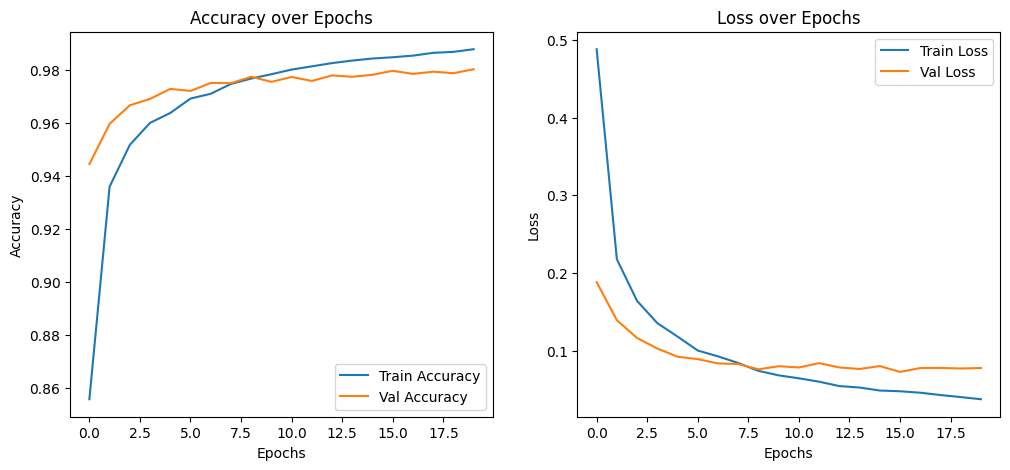

In [11]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [12]:
# Predict on a single example
sample = X_val[22].reshape(1, -1)  # Reshape to match model input
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Label: 1


In [13]:
# Save the model in HDF5 format
model.save("mnist_ann_model.h5")
print("Model saved successfully as mnist_ann_model.h5")

Model saved successfully as mnist_ann_model.h5
